In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [ ]:
# Importação do dataset
df = pd.read_csv('./sample_data/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Exploração dos dados

## Informações do dataset

In [ ]:
# Maior entendimento nos diferentes dados existentes
# Percebe-se que a coluna Booking_ID é diferente para cada dado
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
# Excluindo coluna de atributos únicos e irrelevantes (ID da reserva)
df = df.drop(['Booking_ID'], axis = 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Soma de entradas nulas
# Percebe-se que não há nenhuma entrada nula, portanto, não haverá tratamento nesse quesito
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Descrição do dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
# Analisando a divisão dos preços na feature alvo
pd.qcut(df.avg_price_per_room, q=3).head()

0    (-0.001, 88.0]
1     (88.0, 113.5]
2    (-0.001, 88.0]
3     (88.0, 113.5]
4     (88.0, 113.5]
Name: avg_price_per_room, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 88.0] < (88.0, 113.5] < (113.5, 540.0]]

Podemos inferir uma divisão em 3 categorias diferentes:
- valor de 0 até 88.0;
- valor 89 até 115;
- valor acima de 115.

In [ ]:
# Checando os tipos dos atributos
# Percebe-se a existência de atributos numéricos e categóricos no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

##Analisando atributos numéricos

Os atributos numéricos não necessitam de processamento para que seja analisada a correlação entre eles.

In [ ]:
# Criando cópia do dataset com drop dos atributos categóricos, restando apenas os numéricos (tipo int ou float)
df_numeric = df.drop(['booking_status', 'market_segment_type', 'room_type_reserved', 'type_of_meal_plan'], axis=1)

É aplicada a Correlação de Pearson para entender, inicialmente, a dependência dos atributos, principalmente com o "avg_price_per_room", que será posteriormente classificado.

Text(0.5, 1.0, 'Heatmap da Correlação de Pearson')

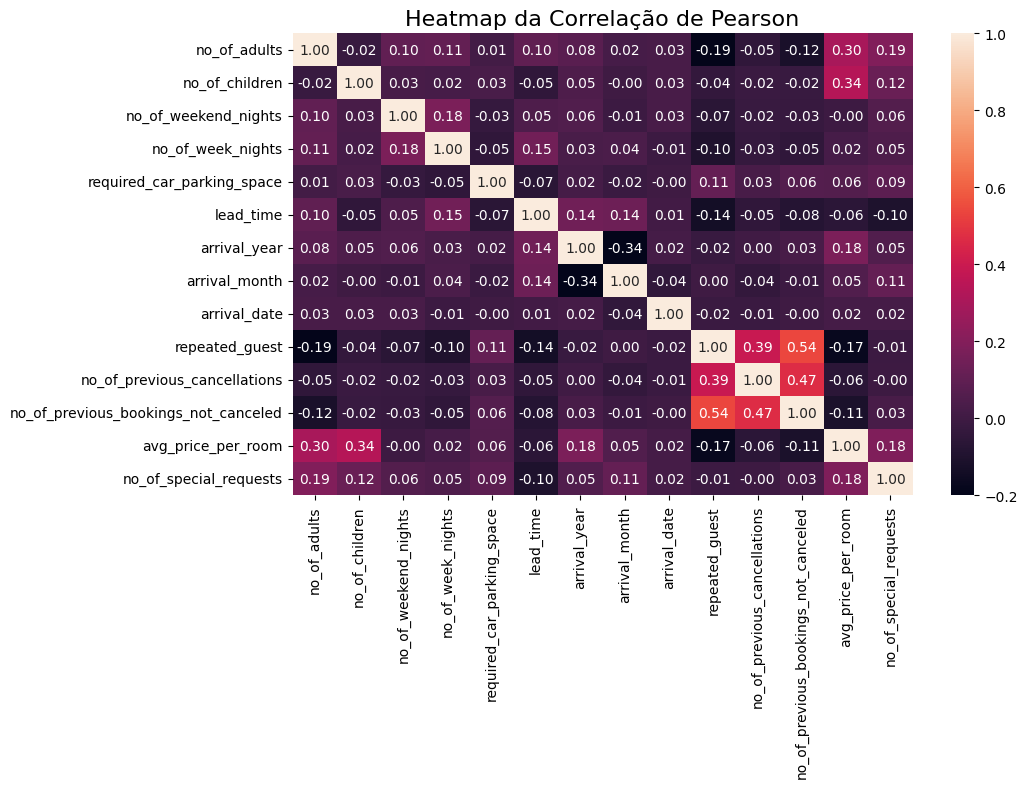

In [ ]:
# Plotando Correlação de Pearson nos atributos numéricos
pearson_correlation = df_numeric.corr()
plt.figure(figsize=(10,6))
sns.heatmap(pearson_correlation, annot=True, fmt='.2f', vmin=-0.2, vmax=1)
plt.title('Heatmap da Correlação de Pearson', fontsize=16)


In [ ]:
# Observando quais são os atributos mais influentes
pearson_correlation['avg_price_per_room'].sort_values(ascending=True)

repeated_guest                         -0.174900
no_of_previous_bookings_not_canceled   -0.113684
no_of_previous_cancellations           -0.063340
lead_time                              -0.062596
no_of_weekend_nights                   -0.004525
arrival_date                            0.017898
no_of_week_nights                       0.022753
arrival_month                           0.054423
required_car_parking_space              0.061304
arrival_year                            0.178605
no_of_special_requests                  0.184381
no_of_adults                            0.296886
no_of_children                          0.337728
avg_price_per_room                      1.000000
Name: avg_price_per_room, dtype: float64

É possível analisar quais são os atributos com correlação negativa.


## Analisando atributos categóricos

In [ ]:
# Criando cópia do dataset apenas com os atributos categóricos
df_categorical = df[['booking_status', 'market_segment_type', 'room_type_reserved', 'type_of_meal_plan']]
df_categorical.head()

,booking_status,market_segment_type,room_type_reserved,type_of_meal_plan
0,Not_Canceled,Offline,Room_Type 1,Meal Plan 1
1,Not_Canceled,Online,Room_Type 1,Not Selected
2,Canceled,Online,Room_Type 1,Meal Plan 1
3,Canceled,Online,Room_Type 1,Meal Plan 1
4,Canceled,Online,Room_Type 1,Not Selected


É analisada quais são os valores adotados pelos dados em cada atributo.

In [ ]:
df_categorical['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [ ]:
df_categorical['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [ ]:
df_categorical['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [ ]:
df_categorical['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Dados apresentados em: type_of_meal_plan e room_type_reserved aparentam ter certa hierarquia entre si.

Dados apresentados no restante dos dados numéricos aparentam não terem relação hierárquica.

## Transformações necessárias no dataset

Primeiro, necessário que todos os devidos atributos sejam numéricos.

In [ ]:
df_encoded = df
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Os dados categóricos serão transformados para que possam ser analisadas suas correlações com o atributo a ser classificado.

In [ ]:
label_encoder = LabelEncoder()
# Encoder nos atributos categóricos não ordinais
df_encoded['market_segment_type'] = label_encoder.fit_transform(df_encoded['market_segment_type'])
df_encoded['booking_status'] = label_encoder.fit_transform(df_encoded['booking_status'])

# Hot Encoder nos atributos categóricos não ordinais
df_encoded = pd.get_dummies(df, prefix = ['type_of_meal_plan', 'room_type_reserved'], columns = ['type_of_meal_plan', 'room_type_reserved'])
df_encoded = df_encoded * 1 # multiplicação por 1 para transformar True/False em 1/0
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,2,0,1,2,0,224,2017,10,2,3,...,0,0,0,1,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,4,...,0,0,1,1,0,0,0,0,0,0
2,1,0,2,1,0,1,2018,2,28,4,...,0,0,0,1,0,0,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,4,...,0,0,0,1,0,0,0,0,0,0
4,2,0,1,1,0,48,2018,4,11,4,...,0,0,1,1,0,0,0,0,0,0


Divisão de "avg_price_per_room" em:


*   0 caso < 88
*   1 caso > 89 e < 115
*   2 caso >= 115



In [ ]:
# Criação de nova coluna para representar as labels (label_avg_price_per_room)
# Categorização de preços em 0, 1 ou 2
df_labeled_encoded = df_encoded
df_labeled_encoded['label_avg_price_per_room'] = [0 if df_encoded['avg_price_per_room'][i] <= 88 else 1 if df_encoded['avg_price_per_room'][i] > 89 and df_encoded['avg_price_per_room'][i] < 115 else 2 for i in range(len(df_encoded))]
df_labeled_encoded = df_labeled_encoded.drop(['avg_price_per_room'], axis = 1)

In [ ]:
df_labeled_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,label_avg_price_per_room
0,2,0,1,2,0,224,2017,10,2,3,...,0,0,1,0,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,4,...,0,1,1,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,4,...,0,0,1,0,0,0,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,4,...,0,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,4,...,0,1,1,0,0,0,0,0,0,1


Finalizadas as transformações no dataset.

Agora, analisar as correlações entre todos os atributos.

## Relações e proporções no dataset

In [ ]:
# Checando distribuição de dados dos atributos
df_labeled_encoded['label_avg_price_per_room'].value_counts()

label_avg_price_per_room
2    12393
0    12164
1    11718
Name: count, dtype: int64

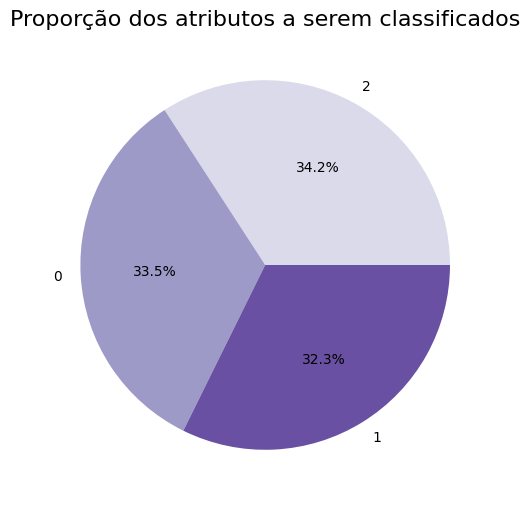

In [ ]:
# Gráfico de pizza checar distribuição da feature no dataset

label_price_per_room_counts = df_labeled_encoded['label_avg_price_per_room'].value_counts()
label_price_per_room_proportions = df_labeled_encoded['label_avg_price_per_room'].value_counts(normalize=True)

label_encoder = LabelEncoder()
label_encoder.fit(df_labeled_encoded['label_avg_price_per_room'])

plt.figure(figsize=(10, 6))
plt.pie(label_price_per_room_counts, labels=label_encoder.inverse_transform(label_price_per_room_counts.index), autopct='%1.1f%%', colors=sns.color_palette('Purples', len(label_price_per_room_counts)))
plt.title('Proporção dos atributos a serem classificados', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Heatmap da Correlação de Pearson')

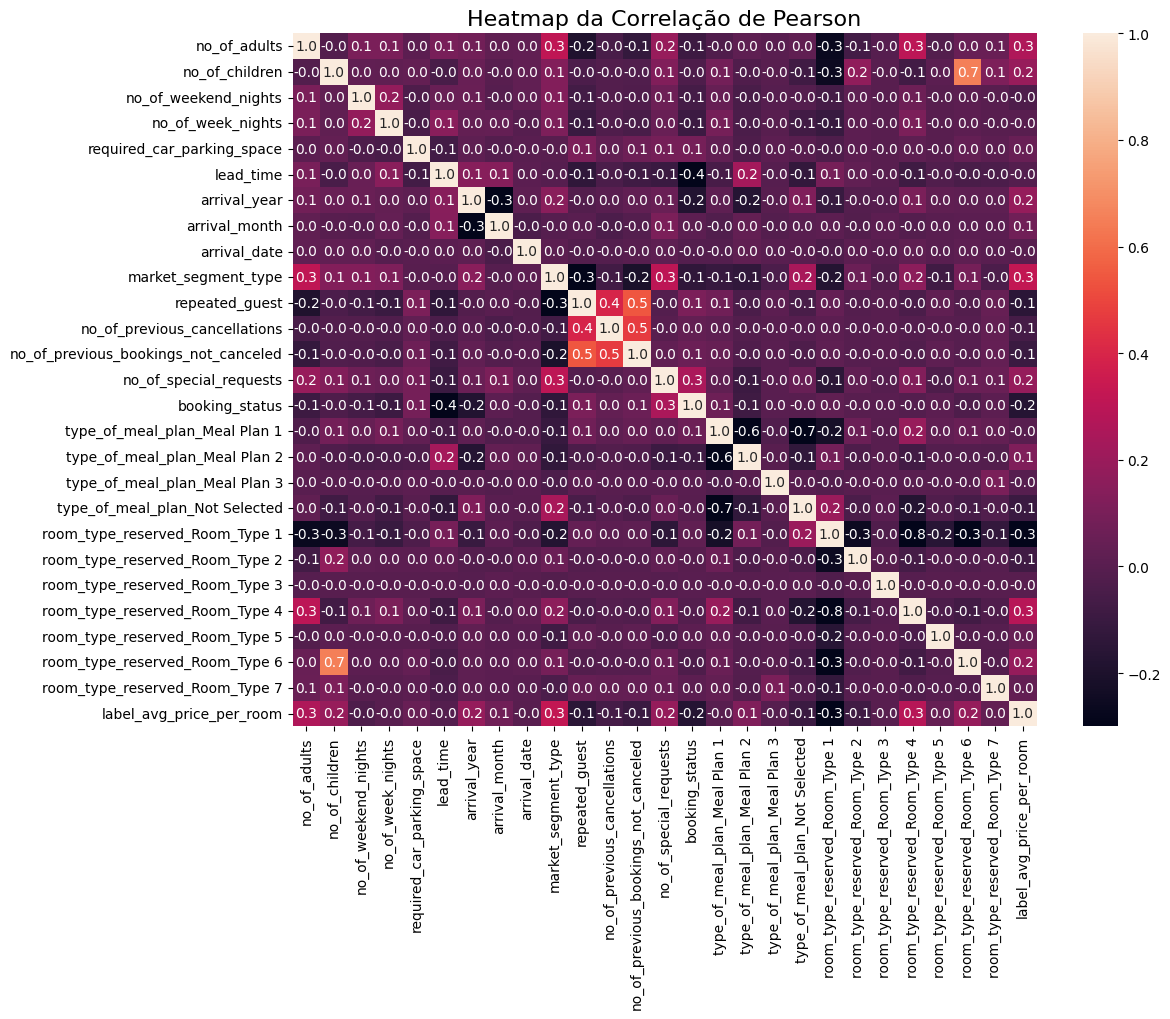

In [ ]:
# Plotando Correlação de Pearson

pearson_correlation = df_labeled_encoded.corr()
plt.figure(figsize=(12,9))
sns.heatmap(pearson_correlation, annot=True, fmt='.1f', vmin=-0.3)
plt.title('Heatmap da Correlação de Pearson', fontsize=16)


In [ ]:
# Observando quais são os atributos mais influentes
pearson_correlation['label_avg_price_per_room'].sort_values(ascending=True)

room_type_reserved_Room_Type 1         -0.318022
booking_status                         -0.170329
repeated_guest                         -0.149852
type_of_meal_plan_Not Selected         -0.097731
no_of_previous_bookings_not_canceled   -0.097055
room_type_reserved_Room_Type 2         -0.077245
no_of_previous_cancellations           -0.061981
no_of_weekend_nights                   -0.031313
lead_time                              -0.010953
type_of_meal_plan_Meal Plan 3          -0.008652
room_type_reserved_Room_Type 3         -0.004931
no_of_week_nights                      -0.002275
arrival_date                           -0.001958
type_of_meal_plan_Meal Plan 1          -0.000771
room_type_reserved_Room_Type 7          0.034091
room_type_reserved_Room_Type 5          0.043015
required_car_parking_space              0.046196
arrival_month                           0.071042
type_of_meal_plan_Meal Plan 2           0.119827
arrival_year                            0.183327
no_of_special_reques

Os seguintes atributos apresentaram valor inferior a 0 em:
- room_type_reserved_Room_Type 1
- booking_status
- repeated_guest
- type_of_meal_plan_Not Selected
- no_of_previous_bookings_not_canceled
- room_type_reserved_Room_Type 2
- no_of_previous_cancellations
- no_of_weekend_nights
- lead_time
- type_of_meal_plan_Meal Plan 3
- room_type_reserved_Room_Type 3
- no_of_week_nights
- arrival_date
- type_of_meal_plan_Meal Plan 1

Isso significa serem atributos que não contribuem para a classificação do atributo utilizando a Correlação de Pearson como parâmetro.


In [ ]:
# Analisar F-Test

X = df_labeled_encoded.drop('label_avg_price_per_room', axis=1)
y = df_labeled_encoded['label_avg_price_per_room']

# Cálculo dos valores F e p
f_values, p_values = f_classif(X, y)

f_values_series = pd.Series(f_values, index=X.columns)
p_values_series = pd.Series(p_values, index=X.columns)

# Seleciona características com p-value < 0.01
relevant_features = p_values_series[p_values_series < 0.01].index
relevant_features_f_values = f_values_series[relevant_features]

# Características relevantes com valores F e p
relevant_features_info = pd.DataFrame({
    'F_value': f_values_series[relevant_features],
    'p_value': p_values_series[relevant_features]
})

print("Características relevantes:")
print(relevant_features_info) # maior accuracy

Características relevantes:
                                          F_value        p_value
no_of_adults                          1362.125125   0.000000e+00
no_of_children                         853.876039   0.000000e+00
no_of_weekend_nights                    18.780747   7.044423e-09
required_car_parking_space              43.319306   1.618443e-19
lead_time                              183.108359   7.513050e-80
arrival_year                           678.471341  5.266258e-290
arrival_month                          117.439230   1.449492e-51
market_segment_type                   2112.184899   0.000000e+00
repeated_guest                         477.452077  2.126438e-205
no_of_previous_cancellations            78.688058   7.945715e-35
no_of_previous_bookings_not_canceled   217.306636   1.534103e-94
no_of_special_requests                 664.704539  3.067988e-284
booking_status                         580.844429  4.986373e-249
type_of_meal_plan_Meal Plan 1           28.657260   3.665496e-

Por meio do F-test, podemos apontar atributos extremamente relevantes para classificação do atributo alvo por apresentarem alto F_value e p_value próximo de 0, são eles:
- no_of_adults
- no_of_children
- market_segment_type
- room_type_reserved_Room_Type_1
- room_type_reserved_Room_Type_4
- room_type_reserved_Room_Type_6

Como conclusão, serão utilizados os atributos que apresentaram p_value próximo de 0 no F-test em conjunto com os atributos que apresentaram valor na Correlação de Pearson superior a 0.1:


- no_of_adults
- no_of_children
- no_of_weekend_nights
- required_car_parking_space
- lead_time
- arrival_year
- arrival_month
- arrival_date
- market_segment_type
- repeated_guest
- no_of_special_requests
- booking_status
- type_of_meal_plan_Meal Plan 1
- type_of_meal_plan_Meal Plan 2
- type_of_meal_plan_Not Selected
- room_type_reserved_Room_Type 1
- room_type_reserved_Room_Type 4
- room_type_reserved_Room_Type 6




# Treinamento do modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Retomando dataset
df_labeled_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,label_avg_price_per_room
0,2,0,1,2,0,224,2017,10,2,3,...,0,0,1,0,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,4,...,0,1,1,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,4,...,0,0,1,0,0,0,0,0,0,0
3,2,0,0,2,0,211,2018,5,20,4,...,0,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,4,...,0,1,1,0,0,0,0,0,0,1


In [ ]:
# Novo dataset apenas com as colunas selecionadas

selected_features = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'market_segment_type',
    'repeated_guest',
    'no_of_special_requests',
    'booking_status',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 6'
]


df_selected_features = df_labeled_encoded[selected_features]
df_selected_features


,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 6
0,2,0,1,0,224,2017,10,2,3,0,0,1,1,0,0,1,0,0
1,2,0,2,0,5,2018,11,6,4,0,1,1,0,0,1,1,0,0
2,1,0,2,0,1,2018,2,28,4,0,0,0,1,0,0,1,0,0
3,2,0,0,0,211,2018,5,20,4,0,0,0,1,0,0,1,0,0
4,2,0,1,0,48,2018,4,11,4,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,0,85,2018,8,3,4,0,1,1,1,0,0,0,1,0
36271,2,0,1,0,228,2018,10,17,4,0,2,0,1,0,0,1,0,0
36272,2,0,2,0,148,2018,7,1,4,0,2,1,1,0,0,1,0,0
36273,2,0,0,0,63,2018,4,21,4,0,0,0,0,0,1,1,0,0


### Random Forest

In [ ]:
# Definindo conjuntos de treino, teste e validação
X = df_selected_features
y = df_labeled_encoded['label_avg_price_per_room']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=0)       # Selecionando dataset de treino
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=0) # Divisão em teste e validação

In [ ]:
# Testar com depth de 10, 20, 30, 40
clf = RandomForestClassifier(max_depth=24, random_state=0)
clf.fit(X_train, y_train)
#accuracy_score(y_test, clf.predict(X_test))

RandomForestClassifier(max_depth=24, random_state=0)

In [ ]:
# Avaliando o modelo com o conjunto de validação
y_pred_val = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Acurácia no conjunto de validação: {accuracy_val}")

# Avaliando o modelo com o conjunto de teste
y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {accuracy_test}")

Acurácia no conjunto de validação: 0.8636280095570668
Acurácia no conjunto de teste: 0.8528114663726571


In [ ]:
print("Conjunto de Validação:")
print(classification_report(y_val, y_pred_val))
print()
print("Conjunto de Teste:")
print(classification_report(y_test, y_pred_test))


Conjunto de Validação:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1829
           1       0.82      0.80      0.81      1724
           2       0.88      0.90      0.89      1888

    accuracy                           0.86      5441
   macro avg       0.86      0.86      0.86      5441
weighted avg       0.86      0.86      0.86      5441


Conjunto de Teste:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1803
           1       0.80      0.80      0.80      1714
           2       0.87      0.89      0.88      1925

    accuracy                           0.85      5442
   macro avg       0.85      0.85      0.85      5442
weighted avg       0.85      0.85      0.85      5442



In [ ]:
print("Conjunto de Validação:")
print(confusion_matrix(y_val, y_pred_val))
print()
print("Conjunto de Teste:")
print(confusion_matrix(y_test, y_pred_test))

Conjunto de Validação:
[[1624  156   49]
 [ 152 1384  188]
 [  46  151 1691]]

Conjunto de Teste:
[[1559  180   64]
 [ 155 1373  186]
 [  43  173 1709]]


### XGBoost

In [ ]:
# Definindo conjuntos de treino e teste
X = df_selected_features
y = df_labeled_encoded['label_avg_price_per_room']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',
    n_estimators=75,
    max_depth=24,
    learning_rate=0.2,
    use_label_encoder=False,
    num_class=len(y.unique())
)

# Treinando o modelo no conjunto de treino
model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,
          verbose=True
          )

[0]	validation_0-mlogloss:0.92264


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:0.79754
[2]	validation_0-mlogloss:0.70536
[3]	validation_0-mlogloss:0.63541
[4]	validation_0-mlogloss:0.58022
[5]	validation_0-mlogloss:0.53686
[6]	validation_0-mlogloss:0.50247
[7]	validation_0-mlogloss:0.47497
[8]	validation_0-mlogloss:0.45333
[9]	validation_0-mlogloss:0.43665
[10]	validation_0-mlogloss:0.42258
[11]	validation_0-mlogloss:0.41139
[12]	validation_0-mlogloss:0.40252
[13]	validation_0-mlogloss:0.39528
[14]	validation_0-mlogloss:0.38985
[15]	validation_0-mlogloss:0.38550
[16]	validation_0-mlogloss:0.38189
[17]	validation_0-mlogloss:0.37872
[18]	validation_0-mlogloss:0.37619
[19]	validation_0-mlogloss:0.37462
[20]	validation_0-mlogloss:0.37335
[21]	validation_0-mlogloss:0.37227
[22]	validation_0-mlogloss:0.37148
[23]	validation_0-mlogloss:0.37037
[24]	validation_0-mlogloss:0.36955
[25]	validation_0-mlogloss:0.36935
[26]	validation_0-mlogloss:0.36928
[27]	validation_0-mlogloss:0.36974
[28]	validation_0-mlogloss:0.36996
[29]	validation_0-mlogloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
# Avaliando o modelo no conjunto de teste
accuracy = model.score(X_test, y_test)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Accuracy on test set: 86.49%


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',
    n_estimators=70,
    max_depth=15,
    learning_rate=0.3,
    use_label_encoder=False,
    num_class=len(y.unique())
)

# Treinando o modelo no conjunto de treino
model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,  # Parar o treinamento
          verbose=True
          )

[0]	validation_0-mlogloss:0.85897


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:0.71511
[2]	validation_0-mlogloss:0.61913
[3]	validation_0-mlogloss:0.55368
[4]	validation_0-mlogloss:0.50758
[5]	validation_0-mlogloss:0.47542
[6]	validation_0-mlogloss:0.45010
[7]	validation_0-mlogloss:0.43158
[8]	validation_0-mlogloss:0.41965
[9]	validation_0-mlogloss:0.40869
[10]	validation_0-mlogloss:0.40081
[11]	validation_0-mlogloss:0.39517
[12]	validation_0-mlogloss:0.39068
[13]	validation_0-mlogloss:0.38722
[14]	validation_0-mlogloss:0.38353
[15]	validation_0-mlogloss:0.37960
[16]	validation_0-mlogloss:0.37692
[17]	validation_0-mlogloss:0.37364
[18]	validation_0-mlogloss:0.37167
[19]	validation_0-mlogloss:0.37050
[20]	validation_0-mlogloss:0.36972
[21]	validation_0-mlogloss:0.36792
[22]	validation_0-mlogloss:0.36647
[23]	validation_0-mlogloss:0.36482
[24]	validation_0-mlogloss:0.36427
[25]	validation_0-mlogloss:0.36333
[26]	validation_0-mlogloss:0.36273
[27]	validation_0-mlogloss:0.36216
[28]	validation_0-mlogloss:0.36176
[29]	validation_0-mlogloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
# Avaliando o modelo no conjunto de teste
accuracy = model.score(X_test, y_test)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Accuracy on test set: 86.58%


In [ ]:
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3632
           1       0.81      0.82      0.81      3438
           2       0.88      0.90      0.89      3813

    accuracy                           0.87     10883
   macro avg       0.87      0.86      0.86     10883
weighted avg       0.87      0.87      0.87     10883



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3158  367  107]
 [ 273 2824  341]
 [  68  305 3440]]


In [ ]:
from xgboost import XGBClassifier

# Criando uma instância do XGBClassifier
model = XGBClassifier(
    objective='multi:softprob',
    n_estimators=300,
    max_depth=25,
    learning_rate=0.05,
    use_label_encoder=False,
    num_class=len(y.unique())  # Número de classes
)

# Treinando o modelo no conjunto de treino
model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],  # Conjunto de validação para monitorar o desempenho durante o treinamento
          early_stopping_rounds=10,  # Parar o treinamento se a métrica de validação não melhorar por 10 iterações
          verbose=True  # Exibir informações sobre o treinamento
          )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.05173
[1]	validation_0-mlogloss:1.00846
[2]	validation_0-mlogloss:0.96893
[3]	validation_0-mlogloss:0.93229
[4]	validation_0-mlogloss:0.89828
[5]	validation_0-mlogloss:0.86690
[6]	validation_0-mlogloss:0.83760
[7]	validation_0-mlogloss:0.81020
[8]	validation_0-mlogloss:0.78474
[9]	validation_0-mlogloss:0.76089
[10]	validation_0-mlogloss:0.73851
[11]	validation_0-mlogloss:0.71774
[12]	validation_0-mlogloss:0.69813
[13]	validation_0-mlogloss:0.67966
[14]	validation_0-mlogloss:0.66233
[15]	validation_0-mlogloss:0.64601
[16]	validation_0-mlogloss:0.63063
[17]	validation_0-mlogloss:0.61615
[18]	validation_0-mlogloss:0.60251
[19]	validation_0-mlogloss:0.58971
[20]	validation_0-mlogloss:0.57744
[21]	validation_0-mlogloss:0.56602
[22]	validation_0-mlogloss:0.55510
[23]	validation_0-mlogloss:0.54492
[24]	validation_0-mlogloss:0.53542
[25]	validation_0-mlogloss:0.52630
[26]	validation_0-mlogloss:0.51765
[27]	validation_0-mlogloss:0.50940
[28]	validation_0-mlogloss:0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
# Avaliando o modelo no conjunto de teste
accuracy = model.score(X_test, y_test)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Accuracy on test set: 86.49%
